In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert at least 20 sample rows
sample_data = [
    ('Product A', 10, 15.5),
    ('Product B', 5, 25.0),
    ('Product C', 8, 10.0),
    ('Product A', 3, 15.5),
    ('Product B', 7, 25.0),
    ('Product C', 12, 10.0),
    ('Product D', 6, 30.0),
    ('Product E', 4, 45.0),
    ('Product A', 2, 15.5),
    ('Product B', 9, 25.0),
    ('Product C', 1, 10.0),
    ('Product D', 11, 30.0),
    ('Product E', 3, 45.0),
    ('Product A', 7, 15.5),
    ('Product B', 2, 25.0),
    ('Product C', 10, 10.0),
    ('Product D', 5, 30.0),
    ('Product E', 6, 45.0),
    ('Product A', 4, 15.5),
    ('Product C', 9, 10.0),
    ('Product D', 8, 30.0),
    ('Product B', 6, 25.0),
    ('Product E', 5, 45.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 4: Query total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Step 5: Print the results
print("Sales Summary by Product:")
print(df)



Sales Summary by Product:
     product  total_qty  revenue
0  Product A         52    806.0
1  Product B         58   1450.0
2  Product C         80    800.0
3  Product D         60   1800.0
4  Product E         36   1620.0


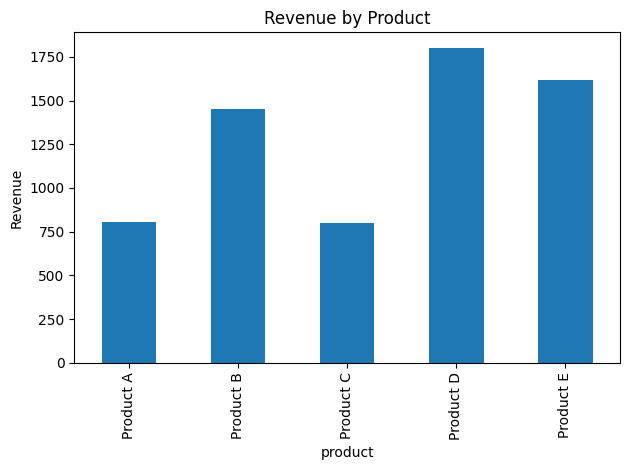

In [8]:
# Step 6: Plot a bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.tight_layout()

# Step 7: Save and show the chart
plt.savefig("sales_chart.png")
plt.show()


In [9]:
# 7. Total revenue overall
total_revenue = cursor.execute("SELECT SUM(quantity * price) FROM sales").fetchone()[0]
print(f"\n1. Total Revenue: ₹{total_revenue:.2f}")


1. Total Revenue: ₹6476.00


In [10]:
# 8. Top-selling product by revenue
top_product = cursor.execute("""
SELECT product, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product 
ORDER BY revenue DESC 
LIMIT 1
""").fetchone()
print(f"\n2. Top-Selling Product by Revenue: {top_product[0]} with ₹{top_product[1]:.2f}")


2. Top-Selling Product by Revenue: Product D with ₹1800.00


In [11]:
# 9. Average price per product
avg_price_df = pd.read_sql_query("""
SELECT product, ROUND(AVG(price), 2) AS avg_price 
FROM sales 
GROUP BY product
""", conn)
print("\n3. Average Price Per Product:")
print(avg_price_df)


3. Average Price Per Product:
     product  avg_price
0  Product A       15.5
1  Product B       25.0
2  Product C       10.0
3  Product D       30.0
4  Product E       45.0


In [12]:
# 10. Total quantity sold across all products
total_qty = cursor.execute("SELECT SUM(quantity) FROM sales").fetchone()[0]
print(f"\n4. Total Quantity Sold (All Products): {total_qty} units")


4. Total Quantity Sold (All Products): 286 units


In [ ]:
# . Revenue by product (reuse original query)
revenue_df = pd.read_sql_query("""
SELECT product, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
""", conn)